# **Plotting McCabe-Thiele diagram through computational methods**

Prepared by:

Zeping Chen - zchen23@nd.edu 

Suporna Paul - spaul2@nd.edu

# **1. Introduction**

When you plot the McCabe-Thiele diagram by hand, have you ever had the thought of there has to be an easier way to do this? Plotting the operating line and step lines computationally is much  more accurate and efficient than plotting it by hand, especially when efficiency of the column is involved. In this notebook, we will learn to plot the McCabe-Thiele diagram using python.

## **1.1 Target audience and learning objectives**


This notebook is intended for ChemE students (both undergraduates and graduate students) who have completed or are currently enrolled in a Chemical Engineering Separations Process class. 

After studying this notebook, completing the activities, and asking questions in class, you should be able to:

*   Use numpy to solve system of linear equations
*   Use pandas to read csv
*   Produce "publication ready" plots
*   Graph the McCabe-Thiele diagram using computational techniques 


## **1.2 Relevant notebooks from the class:**


1.15. [Preparing Publication Quality Figures in Python](https://ndcbe.github.io/data-and-computing/notebooks/01/Publication-Quality-Figures.html)

1.3. [Modeling Systems of Linear Equations](https://ndcbe.github.io/data-and-computing/notebooks/01/Python-Basics-III-Lists-Dictionaries-Enumeration.html)

1.5.[Functions and Scope](https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-and-Scope.html)

4.1. [Python Basics II: Loopy Logic](https://ndcbe.github.io/data-and-computing/notebooks/01/Flow-control.html)

14.7. [Multivariate Linear Regression](https://ndcbe.github.io/data-and-computing/notebooks/14/Multivariate-Linear-Regression.html)

## **1.3 References:**
1. McCabe-Thiele Plot | Neutrium. https://neutrium.net/unit-operations/distillation/mccabe-thiele-plot/ (accessed 2022-10-15


2. Vapor-Liquid Equilibrium (VLE) Model for vapor mole frac methanol and liquid mole frac methanol. https://raw.githubusercontent.com/chennieXD/McCabe-Thiele/main/LiquidVaporEquil.csv (accessed 2022-10-15).

3. Stichlmair, G.; Klein, H.; Rehfeldt, S. Distillation: Principles and Practice, 2nd ed.; Wiley, 2021. 

4. Gorak, A.; Sorensen, E.  Distillation: Fundamentals and Principles (Handbooks in Separation Science), 1st ed.; Academic Press, 2014.

## **1.4 Background information**

For the separation of organic chemicals, distillation columns are the primary equipment that is being used in a number of chemical process industries including petroleum refineries, natural gas processing plants, etc. In short, a distillation column is made of a tube structure that provides surfaces on which condensations and vaporizations occur to separate binary or multi-component mixtures by varying column pressure, temperature, tube size, and tube diameter. McCabe-Thiele diagram is a diagram utilized frequently in designing distillation columns. The diagram is able to provide an estimate of the number of stages needed to perform the desired separation. 

# **2. Solving distillation column using McCabe-Thiele method**

## **Problem description**

A student is trying to calculate the number of stages in a distillation column. Since there is insulation installed to improve the efficiency of the column, he can not just count the number of stages physically. To figure out the number of stages, he is feeding a methanol-water mixture into the column to observe how the column performs. Using a hydrometer, the student is able to measure the specific gravity of the feed: 0.887, distillate: 0.815 and bottoms: 0.990. He is also able to measure the reflux ratio to be 1.25 and the feed has a liquid mole fraction of 0.36. 

Using the above information:
1. Calculate the mole fraction  of each stream from specific gravity 
2.  Plot the vapor liquid equilibrium line and 45 degree line.
3.  Plot the McCabe-Thiele diagram for a total reflux run for the mixture and calculate the number of stages.
4.  Plot the McCabe-Thiele diagram for a feed run for the mixture and calculate the number of stages.
5. Discuss what the McCabe-Thiele diagram tells you about the feed condiiton
6. Discuss how a McCabe-Thiele plot with 100% efficiency is unrealistic.

**Note:** This problem is developed by Zeping Chen and Suporna Paul. Here, we demostrated a step by step process of using this python notebook to solve for distillation column parameters. 

For further information, readers are encouraged to read these following text books which contains similar math problems.

**References:** 

1. Stichlmair, G.; Klein, H.; Rehfeldt, S. Distillation: Principles and Practice, 2nd ed.; Wiley, 2021. 
2. Gorak, A.; Sorensen, E.  Distillation: Fundamentals and Principles (Handbooks in Separation Science), 1st ed.; Academic Press, 2014.



## **2.1. Solve for mole fraction of each stream**

In [ ]:
 # libraries used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### **2.1.a. Obtaining density of mixture through specific gravity**

The Density of each component is given as below: 
*   Water: 997 kg/m$^3$
*   Methanol: 792 kg/m$^3$

In [ ]:
# Density of each species
# water
P_water = 997 # kg/m^3
# Methanol
P_Methanol = 792 # kg/m^3

We can rearrange the definition of specific gravity (SG) to get the density of mixture in each stream:

\begin{align}
        SG = \frac{density \ of \ mixture}{density \ of \ water}
    \end{align}
We also know that the density (ρ) of a mixutre can be calculated by summing the mole fraction (X) of each component by that component's density.
\begin{align}
        ρ_t = ρ_a X_a + ρ_b X_b
    \end{align}
From these information, we can write a system of linear equations to calculate the mole fraction of methanol and water in each stream:
\begin{align}
        1 = X_W + X_M
    \end{align}
\begin{align}
        ρ_t = ρ_M X_M + ρ_W X_W
    \end{align}
**Calculate the mole fraction of Methanol in each stream by solving the above system of equations by hand. Record Your answer on pencil and paper**

### **2.1.b. Create a function to solve  Linear System**

An easier method to calculate the mole fraciton of Methanol in each stream is to use linear algebra.

Matrix form:
$$
\begin{equation}
\begin{bmatrix}
ρ_W & ρ_m\\
1 & 1
\end{bmatrix} \cdot 
\begin{bmatrix}
	X_W \\
	X_M
\end{bmatrix} = 
\begin{bmatrix}
	ρ_t \\
	1
\end{bmatrix}
\end{equation}
$$


Now let's write a function that will solve the linear system of equations to obtain the mole fraction of Methanol in each stream **using Python**.

In [ ]:
def conc_solver(SG):
  ### BEGIN SOLUTIONS

  """ calculates the mole fraction of Methanol in the stream by solving one variable in one equation

  Arguments:
      SG: specfic gravity

  Returns:
      x: molar fraction of Methanol
  """
  # the left matrix above
  a = np.array([[P_water, P_Methanol],[1, 1]])
  # the right matrix above
  b = np.array([SG*P_water, 1])
  
  x = np.linalg.solve(a, b)

  return x[1]
  
  ### END SOLUTIONS

The specific gravity of each stream is given as below: 
*   Feed: 0.887
*   Distillate: 0.815
*   Bottoms: 0.990

In [ ]:
# Specify the Specific Gravity of each stream
 ### BEGIN SOLUTIONS

# Specific Gravity of distilate
SGD = 0.815
# Specific Gravity of bottom
SGB = 0.990
# Specific Gravity of feed
SGZ = 0.887

### END SOLUTIONS

### **2.1.c. Solve for the mole fraction of Methanol in each stream**

Using the function created previously to calculate and print the mole fraction of Methanol in each stream: 

USe **xD** for the distillate stream

USe **xB** for the bottom stream

USe **xZ** for the feed stream

In [ ]:
# calculate the molar fraction of each stream
 ### BEGIN SOLUTIONS

# Distillate
xD = float(conc_solver(SGD))
# Bottom
xB = float(conc_solver(SGB))
# Feed
xZ = float(conc_solver(SGZ))

print('The molar fraction of Methanol in the distillate stream is: %1.3f' %xD)
print('The molar fraction of Methanol in the bottom stream is: %1.3f' %xB)
print('The molar fraction of Methanol in the feed stream is: %1.3f' %xZ)

### END SOLUTIONS

The molar fraction of Methanol in the distillate stream is: 0.900
The molar fraction of Methanol in the bottom stream is: 0.049
The molar fraction of Methanol in the feed stream is: 0.550


# **3. Vapor-liquid equilibrium (VLE) model**



## **3.1. Fit the VLE data points to create a best fit line**

Using the points of VLE obtained from Aspen Plus to generate a best fit line to model VLE. **Hint: Use Excel.** 

In [ ]:
#imports the csv data into python
url = 'https://raw.githubusercontent.com/chennieXD/McCabe-Thiele/main/LiquidVaporEquil.csv'
liq_vap_data = pd.read_csv(url)
print(liq_vap_data)

    vapor mole frac methanol  liquid mole frac methanol
0                   1.000000                       1.00
1                   0.991953                       0.98
2                   0.983907                       0.96
3                   0.975858                       0.94
4                   0.967805                       0.92
5                   0.959746                       0.90
6                   0.951678                       0.88
7                   0.943597                       0.86
8                   0.935500                       0.84
9                   0.927383                       0.82
10                  0.919242                       0.80
11                  0.911073                       0.78
12                  0.902868                       0.76
13                  0.894623                       0.74
14                  0.886331                       0.72
15                  0.877983                       0.70
16                  0.869572                    

## **3.2. Vapor-liquid equilibrium of methanol**

Plot the VLE of methanol using the model generated from linear regression using the format $a+bx+cx^2+dx^3+ex^4+fx^5+gx^6$ and define the equation in the function "VLE_Eq"  Plot the 45 degree line on the same plot.


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 9.80000000e-01 9.60400000e-01 9.41192000e-01
  9.22368160e-01 9.03920797e-01 8.85842381e-01]
 [1.00000000e+00 9.60000000e-01 9.21600000e-01 8.84736000e-01
  8.49346560e-01 8.15372698e-01 7.82757790e-01]
 [1.00000000e+00 9.40000000e-01 8.83600000e-01 8.30584000e-01
  7.80748960e-01 7.33904022e-01 6.89869781e-01]
 [1.00000000e+00 9.20000000e-01 8.46400000e-01 7.78688000e-01
  7.16392960e-01 6.59081523e-01 6.06355001e-01]
 [1.00000000e+00 9.00000000e-01 8.10000000e-01 7.29000000e-01
  6.56100000e-01 5.90490000e-01 5.31441000e-01]
 [1.00000000e+00 8.80000000e-01 7.74400000e-01 6.81472000e-01
  5.99695360e-01 5.27731917e-01 4.64404087e-01]
 [1.00000000e+00 8.60000000e-01 7.39600000e-01 6.36056000e-01
  5.47008160e-01 4.70427018e-01 4.04567235e-01]
 [1.00000000e+00 8.40000000e-01 7.05600000e-01 5.92704000e-01
  4.97871360e-01 4.18211942e-01 3.51298032e-01]
 [1.000000

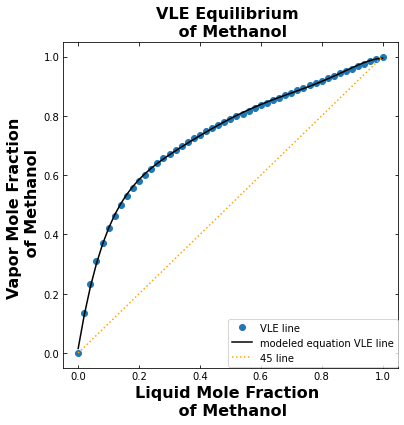

In [ ]:
### BEGIN SOLUTIONS

# extract data from CSV
liqvapy = liq_vap_data['vapor mole frac methanol']
liqvapx = liq_vap_data['liquid mole frac methanol']


# feature matrix (store in 'X')
X = np.ones((len(liqvapx),7))

# Adjust the X matrix 
for counter in range (1,7):  
  X[:,counter] = liqvapx**counter
print(X)
Y = np.array(liqvapy)

# calculate inverse of XT * X
XXinv = np.linalg.inv(np.transpose(X).dot(X))
print("inv(XT X) =\n",XXinv)

XTy = np.transpose(X).dot(Y)
beta_hat = (XXinv) .dot(XTy) 
print("beta_hat =",beta_hat)

# create empty lists to store x and y coordinates for the VLE equilibrium graph
x = liqvapx
liqvapy = liqvapy

def VLE_eq(x):
  """ plot the "stair case" line of the McCabe-Thiele diagram

    Arguments:
        x: x value on the VLE diagram 

    Returns:
        liqvap: y value on the VLE diagram 

    """
  liqvap = beta_hat[0] + beta_hat[1]*x + beta_hat[2]*x**2 + beta_hat[3]*x**3 + beta_hat[4]*x**4 + beta_hat[5]*x**5 + beta_hat[6]*x**6
  return liqvap

y = VLE_eq(x)
# plot the VLE line
fig = plt.figure(figsize=(6,6))
plt.plot(liqvapx,liqvapy,'o')
plt.plot(x,y, color = 'black')
# plot the 45 degree line
plt.plot([0,1],[0,1],color='orange',linestyle=':')
# Formating the plot
plt.xlabel('Liquid Mole Fraction \n of Methanol',fontsize=16,fontweight='bold')
plt.ylabel('Vapor Mole Fraction \n of Methanol',fontsize=16,fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tick_params(direction="in",top=True, right=True)
plt.title('VLE Equilibrium \n of Methanol',fontsize=16, fontweight = 'bold',)
plt.legend(labels=('VLE line', 'modeled equation VLE line' ,'45 line'),fontsize=10,bbox_to_anchor=(1.0, 0.15),borderaxespad=0)
plt.show()

### END SOLUTIONS

## **3.3. Plot the McCabe-Thiele for a total reflux run**

### **3.3.a. Stepping line**

The stepping line connects the points that represent the mole fraction of Methanol in each stage of the distillation column. It starts at the bottom mole fraction of Methanol on the 45 line and ends after reaching the mole fraction of Methanol in the distillate on the 45 line.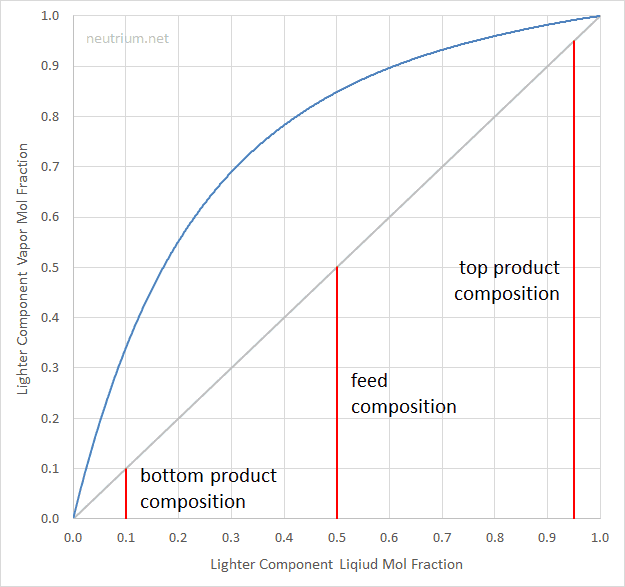

Create a function that is able to generate the points requried to plot the stepping line.

In [ ]:
def stair(slope,y_intercept,x_start ,y_start, y_end, Efficiency = 1):
    ### BEGIN SOLUTIONS
    """ plot the "stair case" line of the McCabe-Thiele diagram

    Arguments:
        slope: slope of the line compared to the vapor-liquid equilibrium line
        y_intercept: y_intercept of the line compared to the vapor-liquid equilibrium line
        x_start: the bottom mole fraction of Methanol 
        y_start: the mole fraction of the Methanol
        y_end: the distillate mole fraction of the mixture 

    Returns:
        xplot: x cordinates of the stair case 
        yplot: y cordinates of the stair case
        n: number of stages in the distillation column

    """
    # establish arrays for the "stair case"
    xplot = []
    yplot = []

    # first point on 45 line
    x = x_start
    y = y_start
    xplot.append(x)
    yplot.append(y)

    # initial number of stages
    n = 0 

    # while the mole fraction is less than the distilate product
    while y < y_end:
        xplot.append(x)
        # create the equation from slope and y-intercept of equation
        equation = slope * x + y_intercept
        y=((VLE_eq(x)) - equation) * Efficiency + equation
        yplot.append(y)
        x = (y - y_intercept) / slope
        #sol=solve(Equation)
        #x=sol[0]
        
        # append points to list
        xplot.append(x)
        yplot.append(y)
        
        # counts the number of stages
        n += 1
    return (xplot, yplot, n)
    ### END SOLUTIONS
    

### **3.3.b. McCabe-Thiele for a total reflux run**

In a total reflux run, there are no feed entering the column and no product leaving the column. The distillate is all refluxed back into the top of the column. The stepping line is plotted along the 45 degree line and the vapor-liquid equilibrium line.

The number of total theoretical stage is  4


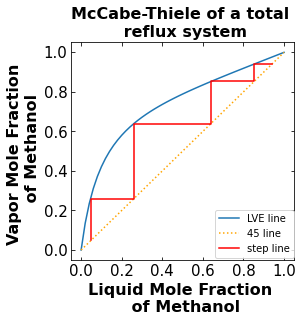

In [ ]:
### BEGIN SOLUTIONS
# slope and y-intercept of the 45 degree line
slope = 1
y_intercept = 0
Efficiency = 1

# call stair funciton to generate the points needed to plot
complete_reflux=stair(slope = 1 ,y_intercept = 0, x_start = xB , y_start = xB, y_end = xD)
# extract x and y points for the plot
xplot = complete_reflux[0]
yplot = complete_reflux[1]
total_stage = complete_reflux[2]
print("The number of total theoretical stage is ",total_stage)

# McCabe-Thiele diagram
fig = plt.figure(figsize=(4,4))
# plot the LVE line
plt.plot(liqvapx,liqvapy)
# plot the 45 degree line
plt.plot([0,1],[0,1],color='orange',linestyle=':')
# plot the VLE line
plt.plot(xplot, yplot, color='red')
plt.xlabel('Liquid Mole Fraction \n of Methanol',fontsize=16,fontweight='bold')
plt.ylabel('Vapor Mole Fraction \n of Methanol',fontsize=16,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
plt.title('McCabe-Thiele of a total \n reflux system',fontsize=16, fontweight = 'bold')
plt.legend(labels=('LVE line', '45 line' , 'step line'),fontsize=10,bbox_to_anchor=(1.0, 0.23),borderaxespad=0)
plt.show()
### END SOLUTIONS

# **4. Plot the McCabe-Thiele diagram of a feed run**

In a more realistic sense, there will be mixture feed entering the column to be separated. As a result, there will also be a distillate stream and a bottoms stream. When there are feed entering the column and product leaving the column, the McCabe-Thiele diagram will have the feed condition (q) line, rectifying line, and stripping line. The rectifying starts at the distillate mole fraction of Methanol and comes down until it corsses the q-line. The q-line starts at the feed mole fraction of Methanol and meets the stripping and rectifying line. The stripping line starts at the bottom mole fraction of Methanol and meets the q-line and rectifying line.  

  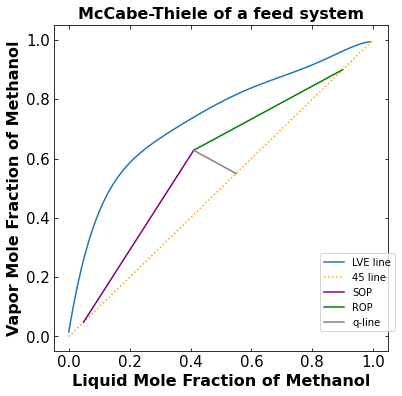

## **4.1. Solve for the slope of the q and rectifying line**

Using the relationship below, calculate the slope of the q and rectifying line. q is the mole fraction of liquid in the feed stream and R is the reflux ratio. Store the slope of q-line as **m_q** and slope of rectifying operating line as **m_rec**


\begin{align}
        m_{feed} = \frac{q}{ q - 1 }
    \end{align}

\begin{align}
        m_{rec} = \frac{R}{ R + 1 }        
    \end{align}



In [ ]:
# Mole fraction of liquid in feed
q = 0.36
# Reflux Ratio
R= 1.25 

### BEGIN SOLUTIONS

# slope of rectifying opearting line
m_rec = R / (R + 1)
# slope of feed condition line (q-line)
m_q = q / (q-1)

### END SOLUTIONS

## **4.2. Intercept of the q-line and the rectifying line, and calculate the slope and y-intercept of the stripping line**

To find the intercept of the q-line and the rectifying line, the point-slope equation of the q-line and the rectifying line can be turned into slope-interecept form and made into a system of linear equations. 
\begin{align}
        y-y_q = m_q(x-x_q)
    \end{align}
\begin{align}
        y-y_{rec} = m_{rec}(x-x_{rec})
    \end{align}

Matrix form:
$$
\begin{equation}
\begin{bmatrix}
m_{rec} & -1\\
m_{q} & -1
\end{bmatrix} \cdot 
\begin{bmatrix}
	x  \\
	y
\end{bmatrix} = 
\begin{bmatrix}
	m_{rec}*x_{rec} - y_{rec}  \\
	m_{q} *x_q - y_q
\end{bmatrix}
\end{equation}
$$

After calculating the intercept, we have two points of the stripping line to calculate the slope and y-intercept to get the slope-intercept form of the equation.

In [ ]:
### BEGIN SOLUTIONS

# solve for the  intercept of the rectifying line and q-line
a = np.array([[m_rec, -1], [m_q, -1]])
b = np.array([m_rec*xD - xD, m_q*xZ - xZ])
intercept = np.linalg.solve(a, b)

# solve for stripping operating line slope and y-intercept
m_strip = (intercept [1] - xB) / (intercept[0] - xB)
y_intercept_strip = xB * (1 - m_strip)

# y-intercept of the rectifying opearting line
y_intercept_rec = xD * (1 - m_rec)

### END SOLUTIONS

## **4.3. Generate the points needed to plot the stepping line, plot the McCabe-Thiele diagram, and calculate the number of stages**

Think where you want the "stair" to stop on your plot when you enter the y_start and y_end for the function.  

In [ ]:
### BEGIN SOLUTIONS

# McCabe-Thiele of a feed run
# stripping portion of stepping line generation
stripping_line = stair(slope = m_strip ,y_intercept = y_intercept_strip, x_start = xB , y_start = xB , y_end = intercept[1])
xplot_stripping = stripping_line[0]
yplot_stripping = stripping_line[1]

# rectifying portion of stepping line generation
rectifying_line = stair(slope = m_rec ,y_intercept = y_intercept_rec, x_start = (yplot_stripping[-1]-y_intercept_rec)/m_rec , y_start = yplot_stripping[-1] , y_end = xD)
xplot_rectifying = rectifying_line[0]
yplot_rectifying = rectifying_line[1]

# complie the x and y points to respective lists 
xplot = xplot_stripping + xplot_rectifying
yplot = yplot_stripping + yplot_rectifying

### END SOLUTIONS

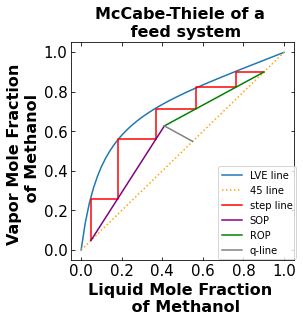

The number of total theoretical stage is  5


In [ ]:
### BEGIN SOLUTIONS

# McCabe-Thiele diagram
fig = plt.figure(figsize=(4,4))
# plot the LVE line
plt.plot(liqvapx,liqvapy)
# plot the 45 degree line
plt.plot([0,1],[0,1],color='orange',linestyle=':')
# plot the step line
plt.plot(xplot, yplot, color='red')
# plot the SOP
plt.plot([xB,intercept[0]],[xB,intercept[1]], color='purple')
# plot the ROP
plt.plot([xD,intercept[0]],[xD,intercept[1]], color='green')
# plot the q-line
plt.plot([xZ,intercept[0]],[xZ,intercept[1]], color='grey')
# Formating the plot
plt.xlabel('Liquid Mole Fraction \n of Methanol',fontsize=16,fontweight='bold')
plt.ylabel('Vapor Mole Fraction \n of Methanol',fontsize=16,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
plt.title('McCabe-Thiele of a \n feed system',fontsize=16, fontweight = 'bold')
plt.legend(labels=('LVE line', '45 line','step line','SOP','ROP','q-line'),fontsize=10,bbox_to_anchor=(1.01, 0.43),borderaxespad=0)
plt.show()
total_stage = stripping_line[2] + rectifying_line[2]
print("The number of total theoretical stage is ",total_stage)

### END SOLUTIONS

# **5. Discussion : Question 1**
From the McCabe-Thiele diagram plotted above what can we say about the phase of the feed stream. **Hint: Look at the slope of the q-line.**

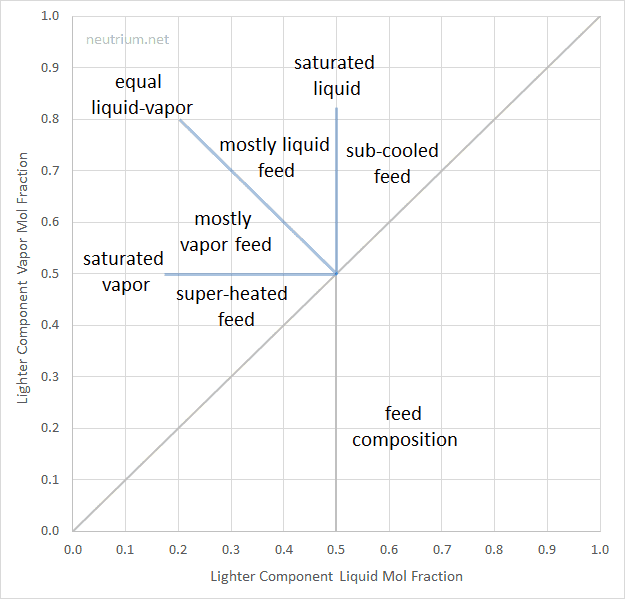

**Your Answer:**

Since the q-line slope is between 0 and -1, it tells us that the feed stream is mostly a vapor feed. This conclusion is in line with the problem statement where q, the mole fraction of liquid, is 0.36, which means the feed is mostly vapor.

# **6. Discussion :  Question 2**

Why is the McCabe-Thiele diagram plotted above is unrealistic in the real world? What would you change to make the plot more realistic. Plot the modified plot and talk about how the number of stages changed. **Hint: Think efficiency. Is there ever 100% efficiency in the real world? A distillation column typically have a efficiency of 60%.**

**Your Answer:**

The diagram plotted above uses 100% efficiency in the column. Since 100% efficiency is not possible in the real world, it makes the plot above unrealistic. A more realistic plot would use a efficiency of around 60% like the one plotted below. The number of stages increased from 5 to 9, which makes sense because less efficiency means more stages are required.

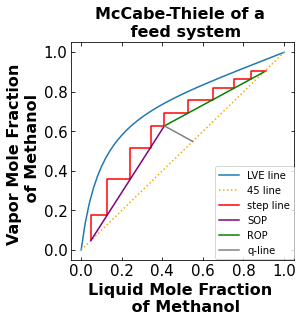

The number of total theoretical stage is  9


In [ ]:
# Effiicency

### BEGIN SOLUTIONS
efficiency = 0.6
### END SOLUTIONS

# McCabe-Thiele of a feed run
# stripping portion of stepping line generation
stripping_line = stair(slope = m_strip ,y_intercept = y_intercept_strip, x_start = xB , y_start = xB , y_end = intercept[1], Efficiency = efficiency)
xplot_stripping = stripping_line[0]
yplot_stripping = stripping_line[1]

# rectifying portion of stepping line generation
rectifying_line = stair(slope = m_rec ,y_intercept = y_intercept_rec, x_start = (yplot_stripping[-1]-y_intercept_rec)/m_rec , y_start = yplot_stripping[-1] , y_end = xD, Efficiency = efficiency)
xplot_rectifying = rectifying_line[0]
yplot_rectifying = rectifying_line[1]

# complie the x and y points to respective liststogether 
xplot = xplot_stripping + xplot_rectifying
yplot = yplot_stripping + yplot_rectifying


# McCabe-Thiele diagram
fig = plt.figure(figsize=(4,4))
# plot the LVE line
plt.plot(liqvapx,liqvapy)
# plot the 45 degree line
plt.plot([0,1],[0,1],color='orange',linestyle=':')
# plot the step line
plt.plot(xplot, yplot, color='red')
# plot the SOP
plt.plot([xB,intercept[0]],[xB,intercept[1]], color='purple')
# plot the ROP
plt.plot([xD,intercept[0]],[xD,intercept[1]], color='green')
# plot the q-line
plt.plot([xZ,intercept[0]],[xZ,intercept[1]], color='grey')
# Formating the plot
plt.xlabel('Liquid Mole Fraction \n of Methanol',fontsize=16,fontweight='bold')
plt.ylabel('Vapor Mole Fraction \n of Methanol',fontsize=16,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(direction="in",top=True, right=True)
plt.title('McCabe-Thiele of a \n feed system',fontsize=16, fontweight = 'bold')
plt.legend(labels=('LVE line', '45 line', 'step line', 'SOP','ROP','q-line'),fontsize=10,bbox_to_anchor=(1.0, 0.43),borderaxespad=0)
plt.show()
total_stage = stripping_line[2] + rectifying_line[2]
print("The number of total theoretical stage is ",total_stage)